Average Quantization Error: 46.26335144042969


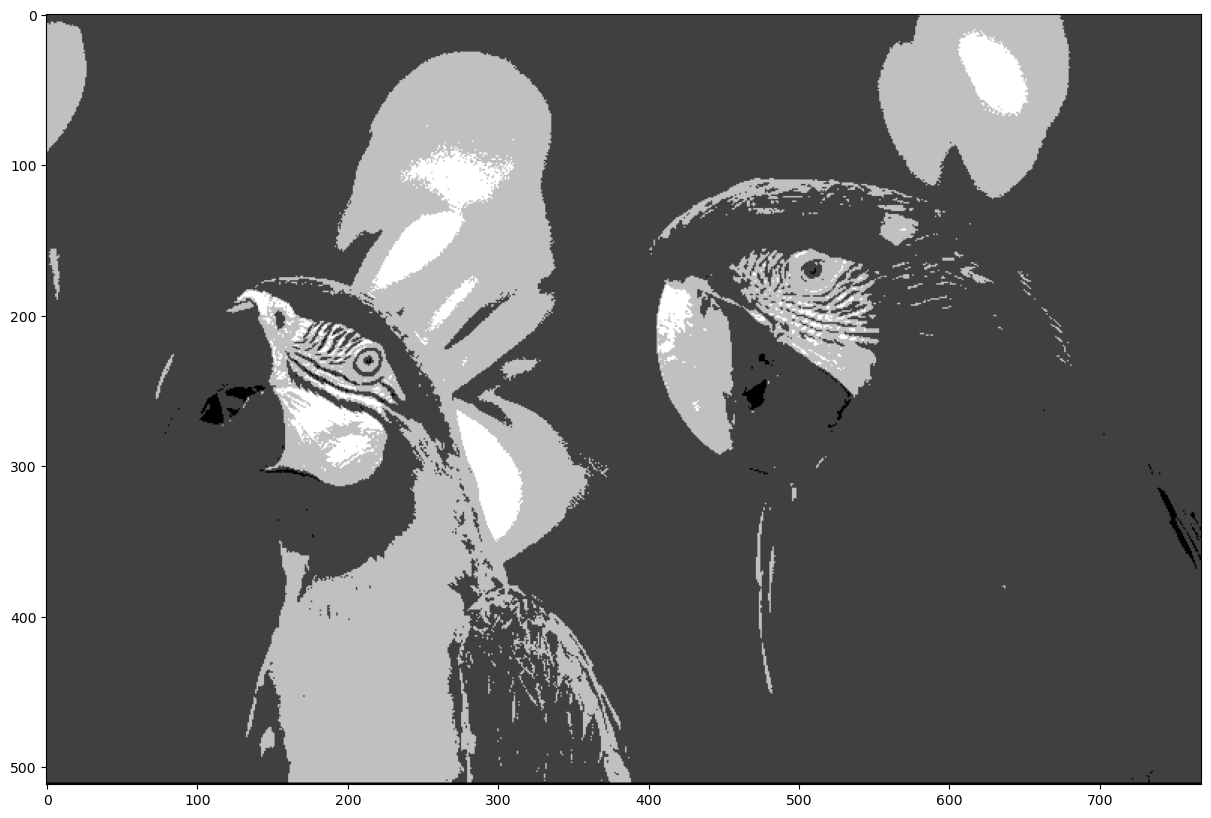

In [25]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Load image
img = cv2.imread('/home/hask/Project/cv_homework/lesson5/data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

# Cast the image to float
img = img.astype(np.float32)


# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)
# size = 16

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        new_pixel = colors[np.argmin(distances)]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel


quantized = quantized.astype(np.uint8)
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized)

# Compute average quantization error
error = np.mean((img - quantized.astype(np.float32)) ** 2)
avg_quant_error = np.sqrt(error)

print(f"Average Quantization Error: {avg_quant_error}")


Average quantization error: 4.206173366970486
Average quantization error: 8.392550150553385


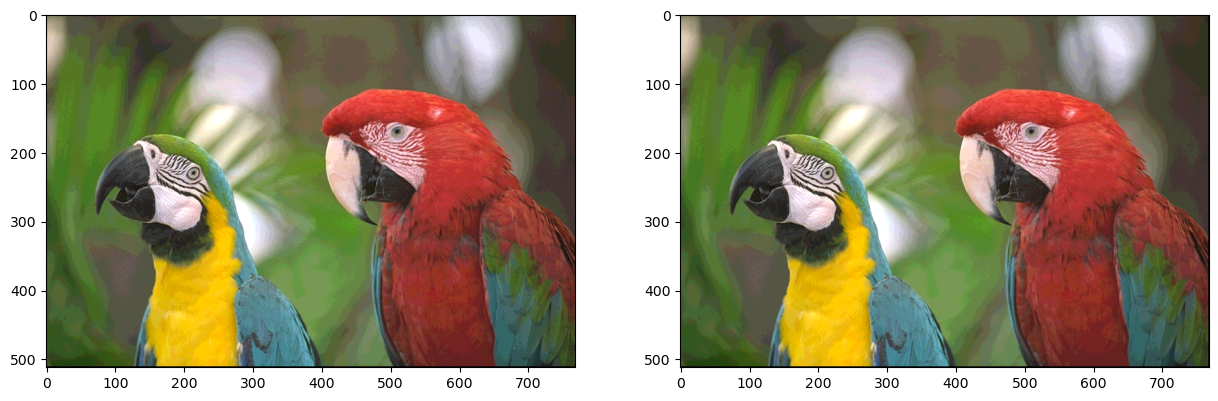

In [28]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Load image
img = cv2.imread('/home/hask/Project/cv_homework/lesson5/data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
# plt.imshow(img)

rows, cols, channels = img.shape
dithering = np.zeros_like(img, dtype=float)


palette = 16
total_error = 0

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the palette (using Euclidean distance)
        new_pixel = np.round(pixel / 255 * (palette - 1)) * (255 / (palette - 1))
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        total_error += np.sum(np.abs(quant_error))
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

# Show quantized image (don't forget to cast back to uint8)
imq = quantized.astype(np.uint8)

avg_quant_error = total_error / (rows * cols * channels)
print(f'Average quantization error: {avg_quant_error}')

# dithering
for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the palette (using Euclidean distance)
        new_pixel = np.round(pixel / 255 * (palette - 1)) * (255 / (palette - 1))
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        total_error += np.sum(np.abs(quant_error))
        
        # Diffuse the quantization error according to the FS diffusion matrix
        dithering[r, c] = new_pixel
        dithering[r, c+1] += quant_error * 7 / 16
        dithering[r+1, c-1] += quant_error * 3 / 16
        dithering[r+1, c] += quant_error * 5 / 16
        dithering[r+1, c+1] += quant_error * 1 / 16

imd = np.clip(dithering, 0, 255).astype(np.uint8)

# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(imq)   # optimally quantized
plt.subplot(122), plt.imshow(imd)   # dithering

avg_dith_error = total_error / (rows * cols * channels)
print(f'Average quantization error: {avg_dith_error}')


In [2]:
Which image has higher quantization error? Optimally quantized or dithered?
Dithered error has higher value.

Which image looks better to you?
Both pictures have subtle differences.

Object `dithered` not found.


Average Quantization Error: 92.71467590332031


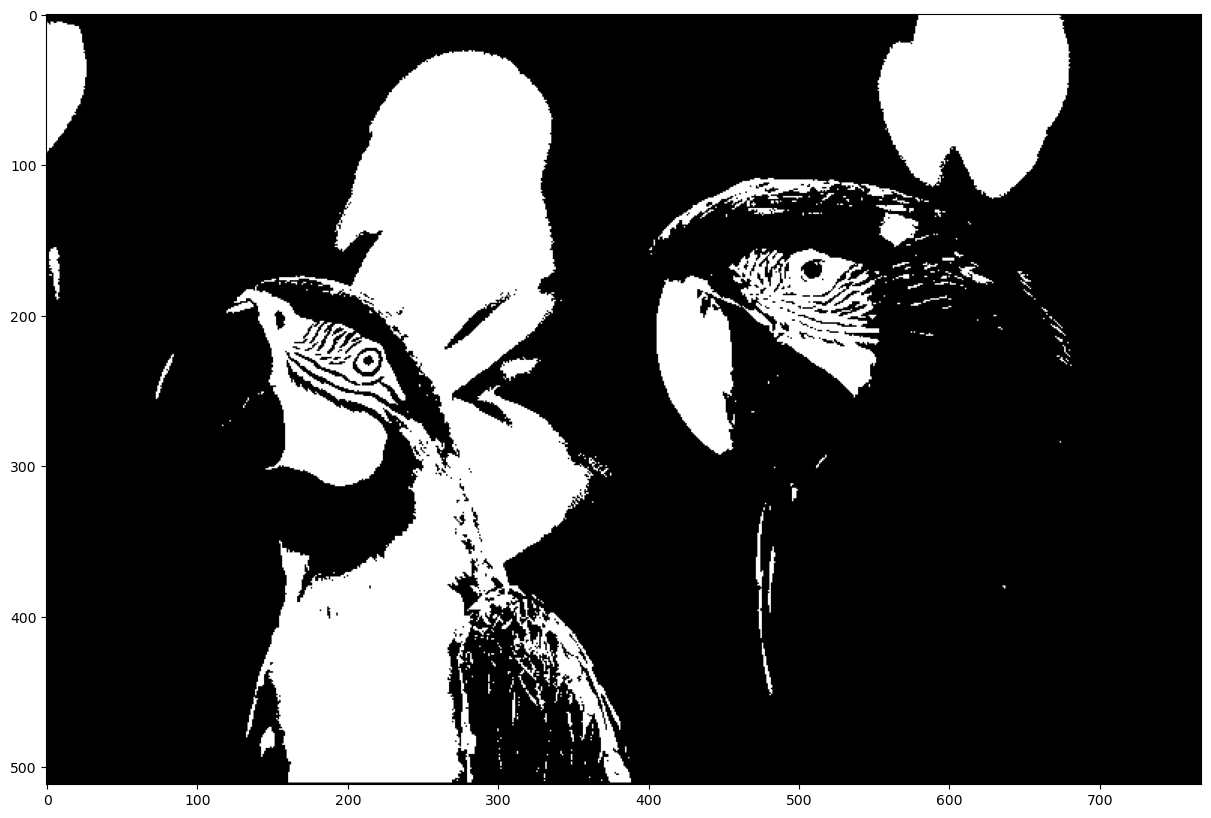

In [3]:
Can you repeat the same process using only two colours: black and white? Show me :-)

import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Load image
img = cv2.imread('/home/hask/Project/cv_homework/lesson5/data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])

# Cast the image to float
img = img.astype(np.float32)


# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        new_pixel = colors[np.argmin(distances)]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel


quantized = quantized.astype(np.uint8)
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized)

# Compute average quantization error
error = np.mean((img - quantized.astype(np.float32)) ** 2)
avg_quant_error = np.sqrt(error)

print(f"Average Quantization Error: {avg_quant_error}")